In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
#!pip install category_encoders

In [59]:
ad=pd.read_csv("/content/adult.csv")   ### Naive Bayes Classifier to predict whether a person makes over 50K a year.

In [60]:
ad.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [61]:
ad.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [62]:
ad.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [63]:
ad.shape

(32560, 15)

<ipython-input-64-01f1fee8f76a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ad.corr())


<Axes: >

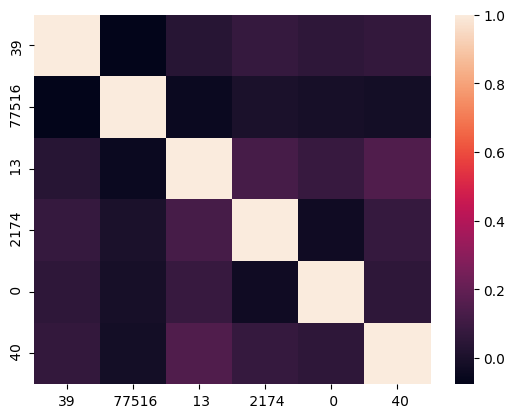

In [64]:
sns.heatmap(ad.corr())

In [65]:
#sns.pairplot(ad,hue="39")

In [66]:
####   EDA

In [67]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

ad.columns = col_names

ad.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [68]:
##Explore categorical variables

In [69]:
# find categorical variables

categorical = [var for var in ad.columns if ad[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [70]:
ad[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [71]:
#view frequency counts of values in categorical variables

for var in categorical:

    print(ad[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [72]:
### ourtarget variable is "income" it is int.

In [73]:
# view frequency distribution of categorical variables

for var in categorical:

    print(ad[var].value_counts()/np.float(len(ad)))

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name:

<ipython-input-73-23ef514c256b>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(ad[var].value_counts()/np.float(len(ad)))
<ipython-input-73-23ef514c256b>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(ad[var].value_counts()/np.float(len(ad)))
<ipython-input-73-23ef514c256b>:5: DeprecationWarning: `np.float` is a deprecated 

In [74]:
# check frequency distribution of values in workclass variable

ad.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [75]:
ad[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [76]:
##Declare feature vector and target variable ####

In [77]:
X = ad.drop(['income'], axis=1)

y = ad['income']

In [78]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [79]:
X.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States


In [80]:
X.shape

(32560, 14)

In [81]:
# Split our data into training and testing sets

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=42,
                                                    stratify=y)

In [83]:
X_train.shape,y_train.shape

((22792, 14), (22792,))

In [84]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [85]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [86]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [87]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [88]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [89]:
import category_encoders as ce


In [90]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [91]:
X_train.dtypes

age                  int64
workclass_1          int64
workclass_2          int64
workclass_3          int64
workclass_4          int64
                     ...  
native_country_38    int64
native_country_39    int64
native_country_40    int64
native_country_41    int64
native_country_42    int64
Length: 108, dtype: object

In [92]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
18219,43,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14190,50,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10079,31,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,41,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
2924,49,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15915,23,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31079,32,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4208,26,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12238,26,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X_test.shape

(9768, 108)

In [95]:
#FEATURE Scaling

In [96]:
cols = X_train.columns

In [97]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [98]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [99]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [100]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,0.30,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
X_train.value_counts()

(age,)  (workclass_1,)  (workclass_2,)  (workclass_3,)  (workclass_4,)  (workclass_5,)  (workclass_6,)  (workclass_7,)  (workclass_8,)  (workclass_9,)  (fnlwgt,)  (education_1,)  (education_2,)  (education_3,)  (education_4,)  (education_5,)  (education_6,)  (education_7,)  (education_8,)  (education_9,)  (education_10,)  (education_11,)  (education_12,)  (education_13,)  (education_14,)  (education_15,)  (education_16,)  (education_num,)  (marital_status_1,)  (marital_status_2,)  (marital_status_3,)  (marital_status_4,)  (marital_status_5,)  (marital_status_6,)  (marital_status_7,)  (occupation_1,)  (occupation_2,)  (occupation_3,)  (occupation_4,)  (occupation_5,)  (occupation_6,)  (occupation_7,)  (occupation_8,)  (occupation_9,)  (occupation_10,)  (occupation_11,)  (occupation_12,)  (occupation_13,)  (occupation_14,)  (occupation_15,)  (relationship_1,)  (relationship_2,)  (relationship_3,)  (relationship_4,)  (relationship_5,)  (relationship_6,)  (race_1,)  (race_2,)  (race_3,)  (

In [102]:
#4. Fit a Naive Bayes model!
#Which Naive Bayes model should we pick, and why?##   [CATEGORICALNB===CONTINEOUS DATA]
#The columns of X are all integer counts, so MultinomialNB is the best choice here.[DESCRET DATA]
#BernoulliNB is best when we have 0/1 counts in all columns of X. (a.k.a. dummy variables)
#GaussianNB is best when the columns of X are Normally distributed. (Practically, though, it gets used whenever BernoulliNB and MultinomialNB are inappropriate.)

In [103]:
# Import our model!

from sklearn.naive_bayes import GaussianNB

In [104]:
# Instantiate our model!

gunb = GaussianNB()

In [105]:
# Fit our model!

model = gunb.fit(X_train,y_train)

In [106]:
y_pred = gunb.predict(X_test)

y_pred

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [107]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8024


In [108]:
y_pred_train = gunb.predict(X_train)

y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [109]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gunb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gunb.score(X_test, y_test)))

Training set score: 0.7978
Test set score: 0.8024


In [110]:

y_test.value_counts()

 <=50K    7416
 >50K     2352
Name: income, dtype: int64

In [111]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[5888 1528]
 [ 402 1950]]

True Positives(TP) =  5888

True Negatives(TN) =  1950

False Positives(FP) =  1528

False Negatives(FN) =  402


In [112]:
confusion_matrix(y_test,y_pred)

array([[5888, 1528],
       [ 402, 1950]])

In [113]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [114]:
print("True Negative : %s "%tn)
print("False Positive : %s "%fp)
print("False Negative : %s "%fn)
print("True Positive : %s "%tp)

True Negative : 5888 
False Positive : 1528 
False Negative : 402 
True Positive : 1950 
